In [324]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [325]:
df = pd.read_csv('train.csv').dropna()
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area Loan_Status  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [327]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       480.000000         480.000000  480.000000        480.000000   
mean       5364.231250        1581.093583  144.735417        342.050000   
std        5668.251251        2617.692267   80.508164         65.212401   
min         150.000000           0.000000    9.000000         36.000000   
25%        2898.750000           0.000000  100.000000        360.000000   
50%        3859.000000        1084.500000  128.000000        360.000000   
75%        5852.500000        2253.250000  170.000000        360.000000   
max       81000.000000       33837.000000  600.000000        480.000000   

       Credit_History  
count      480.000000  
mean         0.854167  
std          0.353307  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [328]:
df['Gender']=df['Gender'].apply(lambda x: 1 if x =='Male' else 0 )
df['Education'] = df['Education'].apply(lambda x: 1 if x=='Graduate' else 0)
df['Self_Employed'] = df['Self_Employed'].apply(lambda x: 1 if x=="Yes" else 0)
df['Married'] = df['Married'].apply(lambda x: 1 if x=='Yes' else 0)
df['Property_Area'] = df['Property_Area'].apply(lambda x: 1 if x=='Semiurban'  else 2 if x=="Urban"  else 0)
df['Dependents'] = df['Dependents'].apply(lambda x: 3 if x=='3+'  else x ).astype(int)
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 1 if x=='Y' else 0)

In [329]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int32  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int32(1), int64(7), object(1)
memory usage: 50.6+ KB


In [330]:
X = df.drop(columns=['Loan_Status','Loan_ID'])
X.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   
5       1        1           2          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area  
1              0  
2              2  
3              2  
4              2  
5              2

<AxesSubplot:>

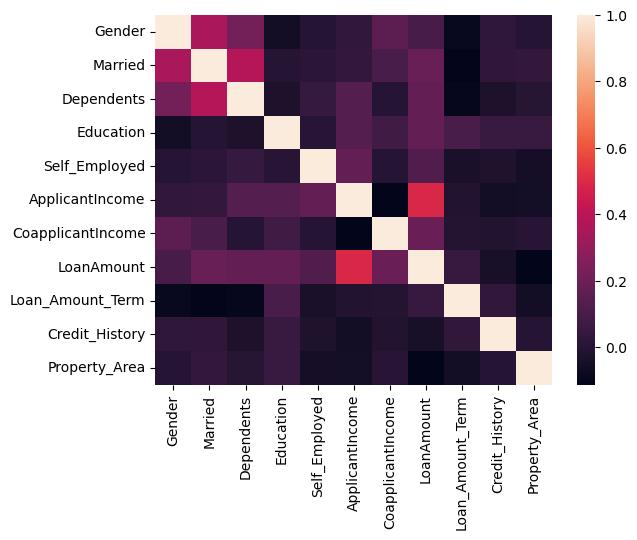

In [331]:
correlation = X.corr()
sns.heatmap(data = correlation)

In [332]:
y = df['Loan_Status']
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [333]:
scaled = StandardScaler().fit_transform(X)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=41)

In [335]:
# Using LogisticRegression for the model training
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [336]:
# Making predictions
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

In [337]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.7916666666666666
The test accuracy is 0.8645833333333334


In [338]:
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [339]:
# Making predictions
y_train_pred = decision_model.predict(X_train)
y_test_pred = decision_model.predict(X_test)

In [340]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.7395833333333334


In [341]:
neighbor_model = KNeighborsClassifier()
neighbor_model.fit(X_train, y_train)

KNeighborsClassifier()

In [342]:
# Making predictions
y_train_pred = neighbor_model.predict(X_train)
y_test_pred = neighbor_model.predict(X_test)

c:\Users\emmanuel.gyateng\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\emmanuel.gyateng\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

In [372]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.8098958333333334
The test accuracy is 0.84375


In [354]:
test_data = pd.read_csv('test.csv').dropna()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 29.4+ KB


In [355]:
test_data['Gender']=test_data['Gender'].apply(lambda x: 1 if x =='Male' else 0 )
test_data['Education'] = test_data['Education'].apply(lambda x: 1 if x=='Graduate' else 0)
test_data['Self_Employed'] = test_data['Self_Employed'].apply(lambda x: 1 if x=="Yes" else 0)
test_data['Married'] = test_data['Married'].apply(lambda x: 1 if x=='Yes' else 0)
test_data['Property_Area'] = test_data['Property_Area'].apply(lambda x: 1 if x=='Semiurban'  else 2 if x=="Urban"  else 0)
test_data['Dependents'] = test_data['Dependents'].apply(lambda x: 3 if x=='3+'  else x ).astype(int)

In [359]:
test_data.drop(columns=['Loan_ID'], inplace= True)

In [365]:
scaled = StandardScaler().fit_transform(test_data)

In [367]:
# Predicting with the Logistic Regression Model
test_logistic_regression = logistic_model.predict(scaled)
test_logistic_regression

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [368]:
test_decision_model = decision_model.predict(scaled)
test_decision_model

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [369]:
test_neighbor_model = neighbor_model.predict(scaled)
test_neighbor_model

c:\Users\emmanuel.gyateng\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)